In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 加载词向量模型

In [3]:
from gensim.models import KeyedVectors

# 该文件未谷歌与训练的300维的词向量模型，直接加载使用
model = KeyedVectors.load_word2vec_format('/content/drive/Shared drives/shao_bingbing/model/goodle_word2vec_model/GoogleNews-vectors-negative300.bin', binary = True)

# 加载单词和对应的词向量
word_list = [k for k,v in model.wv.vocab.items()]
word_vectors = model.wv.vectors

# 将加载的单词和词向量保存为.npy格式的文件
import numpy as np

word_list = [k for k,v in model.wv.vocab.items()]
wordList = np.array(word_list)

np.save('/content/drive/Shared drives/shao_bingbing/model/goodle_word2vec_model/WordList.npy', wordList)
np.save('/content/drive/Shared drives/shao_bingbing/model/goodle_word2vec_model/wordVectors.npy', word_vectors)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


### 对原始的csv文件进行操作，将review保存为对应的文本文件

In [0]:
# 首先对CSV文件进行操作，将正负样本分别放入到该文件夹下的/pos 和 /neg文件夹下
import pandas as pd

imdb_data = pd.read_csv('/content/drive/Shared drives/shao_bingbing/data/imdb-movies-dataset/imdb_master.csv', encoding="latin-1")
imdb_data.head(5)

base_dir = '/content/drive/Shared drives/shao_bingbing/data/imdb-movies-dataset/'

# 需要建立train/pos, train/neg, train/unsup, test/neg, test/pos 几个文件夹
# 将相应的文本数据放入对应的文本里
for i in range(imdb_data.shape[0]):
    list_1 = []
    list_1.append(imdb_data.loc[i,]['type'])
    list_1.append(imdb_data.loc[i,]['label'])
    list_1.append(imdb_data.loc[i,]['file'])
    path = base_dir + ('/').join(list_1)
    with open(path, 'w+') as f:
        f.write(imdb_data.loc[i,]['review'])

train_dir = '/content/drive/Shared drives/shao_bingbing/data/imdb-movies-dataset/train/'

import os
from os.path import isfile, join

# 正向评价文件夹下的所有文件
pos_dir = train_dir + 'pos/'
pos_files = [pos_dir + f for f in os.listdir(pos_dir) if isfile(join(pos_dir, f))]

# 负向向评价文件夹下的所有文件
neg_dir = train_dir + 'neg/'
neg_files = [neg_dir + f for f in os.listdir(neg_dir) if isfile(join(neg_dir, f))]


# 将所有文本数据放入到一个文本下，每一行代表一组数据，只需统计正负样本的分割线即可，防止多次读写造成的时间上的损失
all_text = '/content/drive/Shared drives/shao_bingbing/data/imdb-movies-dataset/train/'
with open(all_text + 'all_text.txt', 'w+') as f:
    for pos in pos_files:
        i = i + 1
        print(i)
        with open(pos, 'r', encoding = 'utf-8') as t:
            line = t.readline()
            f.write(line + '\n')
            
    for neg in neg_files:
        i = i + 1
        print(i)
        with open(neg, 'r', encoding = 'utf-8') as t:
            line = t.readline()
            f.write(line + '\n')

#### 统计文本数据


In [0]:
####################################### version01 ######################
# num_words = []
# i = 0
# for pf in pos_files:
#     i = i + 1
#     print(i)
#     with open(pf, 'r', encoding = 'utf-8') as f:
#         line = f.readline()
#         counter = len(line.split())
#         # 统计每个文本的长度
#         num_words.append(counter)
        
# for nf in neg_files:
#     i = i + 1
#     if i % 100 == 0:
#         print(i)
#     with open(nf, 'r', encoding = 'utf-8') as f:
#         line = f.readline()
#         counter = len(line.split())
#         num_words.append(counter)        
        
# num_files = len(num_words)
# print('文件总数 ', num_files)
# print('所有词的数量', sum(num_words))
# print('平均文本词的长度', sum(num_words)/len(num_words))


# 这里我使用整合后的文本，结果是一致的

num_words = []
with open(all_text + 'all_text.txt', 'r') as f:
    for line in f:
        t = line
        counter = len(line.split())
        num_words.append(counter)
        i += 1
        
num_files = len(num_words)
print("文件总数：",num_files)
print('所有词的数量', sum(num_words))
print('平均文件长度', sum(num_words)/len(num_words))

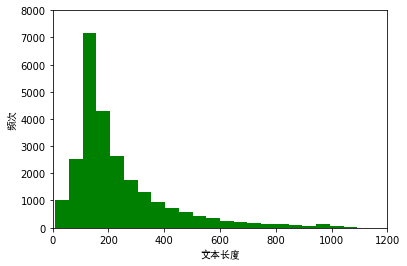

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# 用直方图对数据进行可视化

# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# mpl.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

zhfont = mpl.font_manager.FontProperties(fname='/content/drive/Shared drives/shao_bingbing/data/font/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.hist(num_words, 50, facecolor = 'g')
plt.xlabel('文本长度', fontproperties=zhfont)
plt.ylabel('频次',fontproperties=zhfont)
plt.axis([0, 1200, 0, 8000])
plt.show()

### 为文档单词位置建立索引

In [0]:
# 为单词建立索引，直接在列表中搜索数据太慢
word_dict = {}
for i in range(len(word_list)):
    word_dict[word_list[i]] = i

In [0]:
# # 从上图看出，大部分的文本长度都在300以下，因此我们使用一个25000*300的矩阵来对文本进行索引
# import re
# import numpy as np
# strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

# def cleanSentences(string):
#     # 将所有的字符转化为小写，并去除<br />
#     string = string.lower().replace("<br />", " ")
#     # 去除非法字符
#     return re.sub(strip_special_chars, "", string.lower())

# max_seq_num = 300
# ids = np.zeros((num_files, max_seq_num), dtype = 'int32')
# file_count = 0
# for pf in pos_files:
#     with open(pf, 'r', encoding = 'utf-8') as f:
#         indexCounter = 0
#         line = f.readline()
#         cleanedLine = cleanSentences(line)
#         split = cleanedLine.split()
#         print(file_count)
#         for word in split:
#             try:
#                 ids[file_count][indexCounter] = word_dict[word]
                
#             except KeyError:
#                 ids[file_count][indexCounter] = 399999
            
#             indexCounter = indexCounter + 1
#             if indexCounter >= max_seq_num:
#                 break
#         file_count = file_count + 1

# print('postive files finished')
        
# for nf in neg_files:
#     with open(nf, 'r', encoding = 'utf-8') as f:
#         indexCounter = 0
#         line = f.readline()
#         cleanedLine = cleanSentences(line)
#         split = cleanedLine.split()
        
#         print(file_count)
#         for word in split:
#             try:
#                 ids[file_count][indexCounter] = word_dict[word]
                
#             except KeyError:
#                 ids[file_count][indexCounter] = 399999
            
#             indexCounter = indexCounter + 1
#             if indexCounter >= max_seq_num:
#                 break
#         file_count = file_count + 1


# 从上图看出，大部分的文本长度都在300以下，因此我们使用一个25000*300的矩阵来对文本进行索引
import re
import numpy as np
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    # 将所有的字符转化为小写，并去除<br />
    string = string.lower().replace("<br />", " ")
    # 去除非法字符
    return re.sub(strip_special_chars, "", string.lower())

max_seq_num = 300
ids = np.zeros((num_files, max_seq_num), dtype = 'int32')
file_count = 0

with open(all_text + 'all_text.txt', 'r', encoding = 'utf-8') as f:
    for line in f:
        indexCounter = 0
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        if file_count%100 == 0:
            print(file_count)
        for word in split:
            try:

                ids[file_count][indexCounter] = word_dict[word]


            except ValueError:
                ids[file_count][indexCounter] = 399999

            indexCounter = indexCounter + 1
            if indexCounter >= max_seq_num:
                break
        file_count = file_count + 1

# 保存索引
np.save('/content/drive/Shared drives/shao_bingbing/data/imdb-movies-dataset/idsMatrix.npy', ids)